## Name: Akshat Gupta
## Roll number: 25/AFI/32

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 1. Activation functions

In [2]:
def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

def back_relu(z):
    return (z > 0).astype(float)

def back_sigmoid(z):
    s = sigmoid(z)
    return s * (1 - s)

# 2. Initialize parameters (weights and bias)

In [3]:
def initialize_parameters(dims):
    parameters = {}
    for i in range(1, len(dims)):
        parameters["W" + str(i)] = np.random.randn(dims[i], dims[i - 1]) * 0.01
        parameters["b" + str(i)] = np.zeros((dims[i], 1))
    return parameters

# 3. Forward propagation

In [4]:
def forward_prop(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        A_prev = A
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = np.dot(W, A_prev) + b
        linear_cache = (A_prev, W, b)

        A = relu(Z)
        activation_cache = Z

        cache = (linear_cache, activation_cache)
        caches.append(cache)

    W = parameters['W' + str(L)]
    b = parameters['b' + str(L)]
    Z = np.dot(W, A) + b
    linear_cache = (A, W, b)

    AL = sigmoid(Z)
    activation_cache = Z

    cache = (linear_cache, activation_cache)
    caches.append(cache)

    return AL, caches

# 4. Cost function

In [5]:
def find_cost(AL, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(AL + 1e-12) + (1 - Y) * np.log(1 - AL + 1e-12)) / m
    return cost

# 5. Backward propagation

In [6]:
def backward_prop(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = Y.shape[1]

    dZ = AL - Y
    linear_cache, _ = caches[L - 1]
    A_prev, W, b = linear_cache

    grads["dW" + str(L)] = (1.0 / m) * np.dot(dZ, A_prev.T)
    grads["db" + str(L)] = (1.0 / m) * np.sum(dZ, axis=1, keepdims=True)
    grads["dA" + str(L - 1)] = np.dot(W.T, dZ)

    for l in reversed(range(L - 1)):
        linear_cache, activation_cache = caches[l]
        A_prev, W, b = linear_cache
        Z = activation_cache

        dZ = grads["dA" + str(l + 1)] * back_relu(Z)
        grads["dW" + str(l + 1)] = (1.0 / m) * np.dot(dZ, A_prev.T)
        grads["db" + str(l + 1)] = (1.0 / m) * np.sum(dZ, axis=1, keepdims=True)
        grads["dA" + str(l)] = np.dot(W.T, dZ)

    return grads

# 6. Update parameters

In [7]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters

# 7. Model training function

In [8]:
from tqdm import tqdm

def train(X, Y, dims, learning_rate=0.005, iterations=100):
    costs = []
    accuracies = []
    parameters = initialize_parameters(dims)

    with tqdm(range(1, iterations + 1), desc="Training", unit="iter") as pbar:
        for i in pbar:
            AL, caches = forward_prop(X, parameters)
            cost = find_cost(AL, Y)

            # Handle binary (single output) vs multiclass outputs
            if AL.shape[0] == 1:
                y_pred = (AL > 0.5).astype(int)
                y_true = Y.astype(int)
                accuracy = np.mean(y_pred == y_true)
            else:
                y_pred = np.argmax(AL, axis=0)
                y_true = np.argmax(Y, axis=0)
                accuracy = np.mean(y_pred == y_true)

            grads = backward_prop(AL, Y, caches)
            parameters = update_parameters(parameters, grads, learning_rate)
            costs.append(cost)
            accuracies.append(accuracy)

            if i % 10 == 0:
                tqdm.write(f"Iteration {i}: Loss = {cost:.4f}, Accuracy = {accuracy:.4f}")
                pbar.set_postfix(loss=f"{cost:.4f}", accuracy=f"{accuracy:.4f}")

    return parameters, costs, accuracies

# 8. Linearly separable dataset

In [9]:
X1, y1 = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2,
    random_state=42
)
X1 = X1.T
y1 = y1.reshape(1, -1)

In [10]:
print(X1.shape)
print(y1.shape)

(2, 1000)
(1, 1000)


# 9. Training model 1

In [11]:
model1, loss_history1, accuracy_history1 = train(X1, y1, dims=[2, 1])

Training: 100%|██████████| 100/100 [00:00<00:00, 1332.80iter/s, accuracy=0.9920, loss=0.4039]

Iteration 10: Loss = 0.6576, Accuracy = 0.9280
Iteration 20: Loss = 0.6162, Accuracy = 0.9820
Iteration 30: Loss = 0.5791, Accuracy = 0.9930
Iteration 40: Loss = 0.5457, Accuracy = 0.9930
Iteration 50: Loss = 0.5158, Accuracy = 0.9920
Iteration 60: Loss = 0.4888, Accuracy = 0.9920
Iteration 70: Loss = 0.4644, Accuracy = 0.9920
Iteration 80: Loss = 0.4423, Accuracy = 0.9920
Iteration 90: Loss = 0.4222, Accuracy = 0.9920
Iteration 100: Loss = 0.4039, Accuracy = 0.9920


# 10. Non-linear separable dataset

In [12]:
X2, y2 = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=2,
    class_sep=0.5,
    flip_y=0.1,
    random_state=42
)
X2 = X2.T
y2 = y2.reshape(1, -1)

In [13]:
print(X2.shape)
print(y2.shape)

(2, 500)
(1, 500)


# 11. Training model 2

In [14]:
model2, loss_history2, accuracy_history2 = train(X2, y2, dims=[2, 4, 1])

Training: 100%|██████████| 100/100 [00:00<00:00, 1138.73iter/s, accuracy=0.5080, loss=0.6931]

Iteration 10: Loss = 0.6932, Accuracy = 0.3980
Iteration 20: Loss = 0.6932, Accuracy = 0.4940
Iteration 30: Loss = 0.6932, Accuracy = 0.5040
Iteration 40: Loss = 0.6932, Accuracy = 0.5080
Iteration 50: Loss = 0.6932, Accuracy = 0.5080
Iteration 60: Loss = 0.6932, Accuracy = 0.5080
Iteration 70: Loss = 0.6932, Accuracy = 0.5080
Iteration 80: Loss = 0.6932, Accuracy = 0.5080
Iteration 90: Loss = 0.6932, Accuracy = 0.5080
Iteration 100: Loss = 0.6931, Accuracy = 0.5080


# 12. Plotting loss history

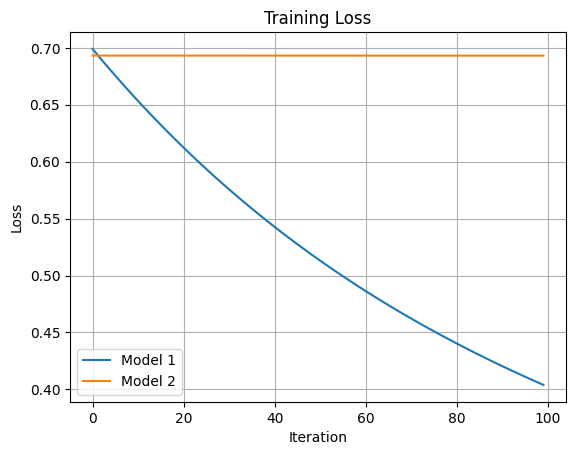

In [15]:
def plot_loss_histories(loss_histories, labels=None):
    for i, losses in enumerate(loss_histories):
        if labels is not None:
            plt.plot(losses, label=labels[i])
        else:
            plt.plot(losses)

    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss_histories([loss_history1, loss_history2], ["Model 1", "Model 2"])